# AV2

![alt text](image-3.png)

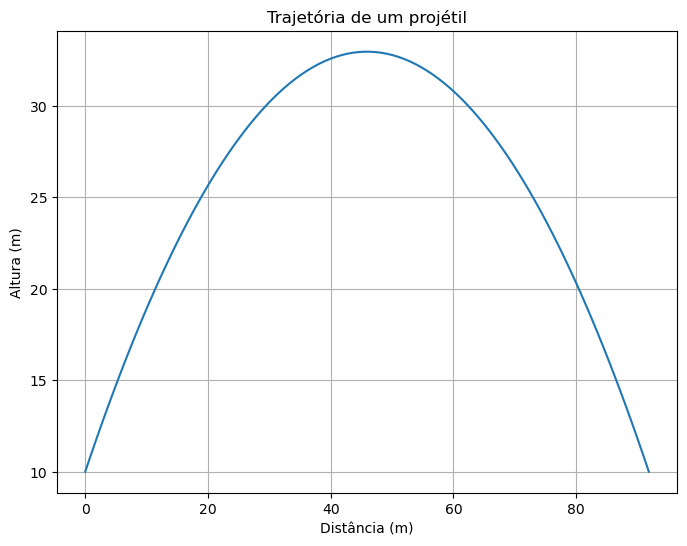

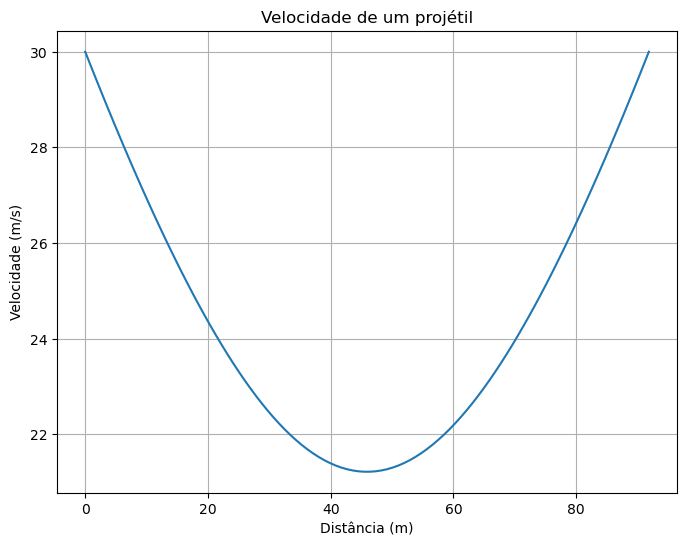

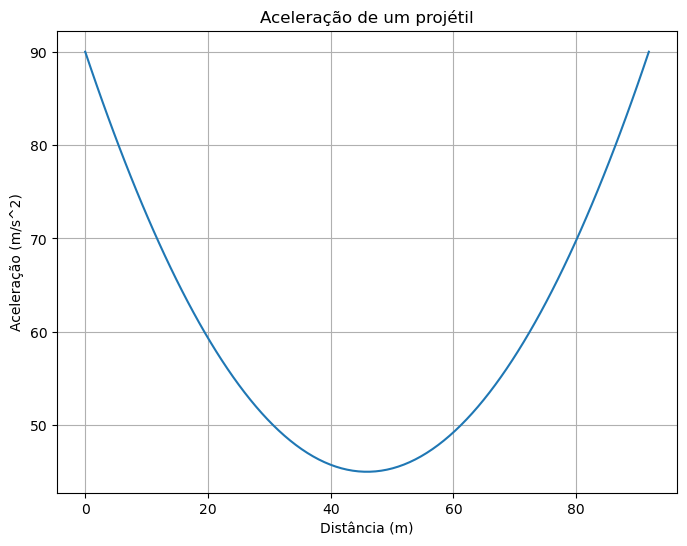

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def calcular_trajetoria(h, v0, angulo, k, g):
    # Converter o ângulo para radianos
    angulo_rad = np.radians(angulo)
    
    # Componentes horizontal e vertical da velocidade inicial
    v0x = v0 * np.cos(angulo_rad)
    v0y = v0 * np.sin(angulo_rad)
    
    # Tempo de voo máximo
    t_max = 2 * v0y / g
    
    # Vetor de tempo
    t = np.linspace(0, t_max, num=100)
    
    # Componentes horizontal e vertical da posição
    x = v0x * t
    y = h + v0y * t - (1/2) * g * t**2
    
    # Vetor de velocidade
    v = np.sqrt(v0x**2 + (v0y - g * t)**2)
    
    # Vetor de aceleração
    a = k * v * v
    
    return x, y, v, a

# Parâmetros do problema
h = 10  # altura inicial em metros
v0 = 30  # velocidade inicial em m/s
angulo = 45  # ângulo de lançamento em graus
k = 0.1  # coeficiente de resistência do ar
g = 9.8  # aceleração da gravidade em m/s^2

# Calcular a trajetória
x, y, v, a = calcular_trajetoria(h, v0, angulo, k, g)

# Plotar o gráfico da trajetória
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('Distância (m)')
plt.ylabel('Altura (m)')
plt.title('Trajetória de um projétil')
plt.grid(True)
plt.show()

# Plotar o gráfico da velocidade
plt.figure(figsize=(8, 6))
plt.plot(x, v)
plt.xlabel('Distância (m)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade de um projétil')
plt.grid(True)
plt.show()

# Plotar o gráfico da aceleração
plt.figure(figsize=(8, 6))
plt.plot(x, a)
plt.xlabel('Distância (m)')
plt.ylabel('Aceleração (m/s^2)')
plt.title('Aceleração de um projétil')
plt.grid(True)
plt.show()


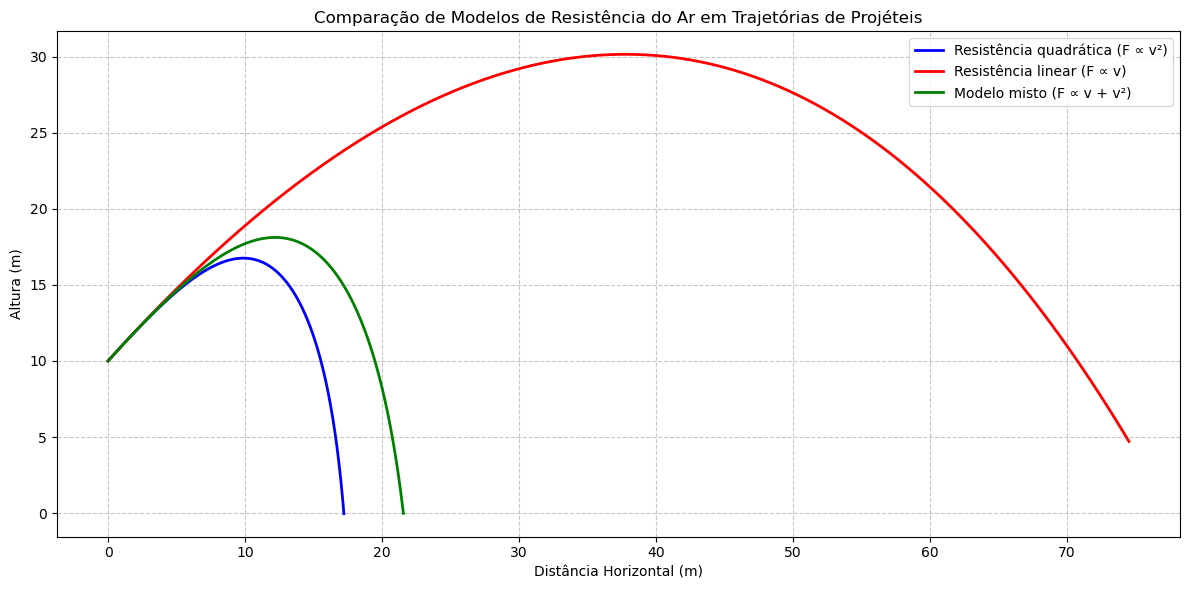

In [3]:


def calcular_trajetoria(altura_inicial, velocidade_inicial, angulo_lancamento, coeficiente_resistencia, gravidade, modelo='quadratico'):
    """
    Simula a trajetória de um projétil considerando diferentes modelos de resistência do ar.
    
    Argumentos:
        altura_inicial: altura de lançamento em metros
        velocidade_inicial: velocidade inicial em m/s
        angulo_lancamento: ângulo de lançamento em graus
        coeficiente_resistencia: coeficiente de resistência do ar
        gravidade: aceleração da gravidade em m/s²
        modelo: tipo de resistência ('quadratico', 'linear' ou 'misto')
    
    Retorna:
        Tupla com arrays de posições (x, y), velocidades e acelerações
    """
    # Convertendo o ângulo para radianos e decompondo a velocidade
    angulo_rad = np.radians(angulo_lancamento)
    vx_inicial = velocidade_inicial * np.cos(angulo_rad)
    vy_inicial = velocidade_inicial * np.sin(angulo_rad)
    
    # Tempo estimado de voo (considerando caso sem resistência do ar)
    tempo_estimado = 2 * vy_inicial / gravidade
    tempos = np.linspace(0, tempo_estimado, 1000)  # 1000 pontos no tempo
    
    # Arrays para armazenar os resultados
    posicoes_x = np.zeros(len(tempos))
    posicoes_y = np.zeros(len(tempos))
    velocidades_x = np.zeros(len(tempos))
    velocidades_y = np.zeros(len(tempos))
    
    # Configuração inicial
    posicoes_x[0], posicoes_y[0] = 0, altura_inicial
    velocidades_x[0], velocidades_y[0] = vx_inicial, vy_inicial
    
    # Passo de tempo para a integração
    delta_t = tempos[1] - tempos[0]
    
    # Simulação passo a passo
    for i in range(1, len(tempos)):
        # Velocidade atual
        velocidade_atual = np.sqrt(velocidades_x[i-1]**2 + velocidades_y[i-1]**2)
        
        # Calcula a aceleração conforme o modelo escolhido
        if modelo == 'quadratico':
            # Resistência proporcional ao quadrado da velocidade
            acel_x = -coeficiente_resistencia * velocidade_atual * velocidades_x[i-1]
            acel_y = -gravidade - coeficiente_resistencia * velocidade_atual * velocidades_y[i-1]
            
        elif modelo == 'linear':
            # Resistência proporcional à velocidade
            acel_x = -coeficiente_resistencia * velocidades_x[i-1]
            acel_y = -gravidade - coeficiente_resistencia * velocidades_y[i-1]
            
        elif modelo == 'misto':
            # Modelo combinado (parte linear + parte quadrática)
            parte_linear = coeficiente_resistencia * 0.3
            parte_quad = coeficiente_resistencia * 0.7
            acel_x = -parte_linear * velocidades_x[i-1] - parte_quad * velocidade_atual * velocidades_x[i-1]
            acel_y = -gravidade - parte_linear * velocidades_y[i-1] - parte_quad * velocidade_atual * velocidades_y[i-1]
            
        else:
            raise ValueError(f"Modelo '{modelo}' não reconhecido. Use: 'quadratico', 'linear' ou 'misto'")
        
        # Atualiza velocidade e posição
        velocidades_x[i] = velocidades_x[i-1] + acel_x * delta_t
        velocidades_y[i] = velocidades_y[i-1] + acel_y * delta_t
        posicoes_x[i] = posicoes_x[i-1] + velocidades_x[i-1] * delta_t
        posicoes_y[i] = posicoes_y[i-1] + velocidades_y[i-1] * delta_t
        
        # Verifica se o projétil atingiu o solo
        if posicoes_y[i] < 0:
            # Ajusta os arrays para o tempo de voo real
            tempos = tempos[:i+1]
            posicoes_x = posicoes_x[:i+1]
            posicoes_y = posicoes_y[:i+1]
            velocidades_x = velocidades_x[:i+1]
            velocidades_y = velocidades_y[:i+1]
            break
    
    # Calcula a velocidade e aceleração totais
    velocidade_total = np.sqrt(velocidades_x**2 + velocidades_y**2)
    aceleracao = np.sqrt(np.diff(velocidades_x)**2 + np.diff(velocidades_y)**2) / delta_t
    aceleracao = np.append(aceleracao, aceleracao[-1])  # mantém o mesmo tamanho
    
    return posicoes_x, posicoes_y, velocidade_total, aceleracao

# Configuração da simulação
altura_inicial = 10.0  # metros
velocidade_inicial = 30.0  # m/s
angulo_lancamento = 45  # graus
coeficiente_resistencia = 0.1
gravidade = 9.8  # m/s²

# Modelos que vamos comparar
modelos_disponiveis = ['quadratico', 'linear', 'misto']
cores = ['blue', 'red', 'green']
legendas = [
    'Resistência quadrática (F ∝ v²)',
    'Resistência linear (F ∝ v)',
    'Modelo misto (F ∝ v + v²)'
]

# Plotando os resultados
plt.figure(figsize=(12, 6))
for modelo, cor, legenda in zip(modelos_disponiveis, cores, legendas):
    x, y, v, a = calcular_trajetoria(
        altura_inicial,
        velocidade_inicial,
        angulo_lancamento,
        coeficiente_resistencia,
        gravidade,
        modelo
    )
    plt.plot(x, y, color=cor, label=legenda, linewidth=2)

plt.title('Comparação de Modelos de Resistência do Ar em Trajetórias de Projéteis')
plt.xlabel('Distância Horizontal (m)')
plt.ylabel('Altura (m)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()